In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

##Histogram
A histogram is an accurate representation of the distribution of numerical data.

Example: 
Data $x = [1,2,3,4,2,3,4,3,4,4]$

Number of bins $= 4$



<BarContainer object of 4 artists>

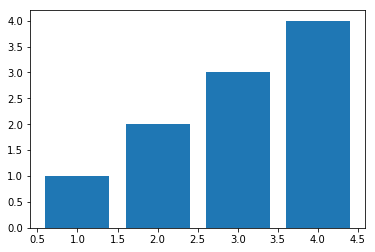

In [20]:
x = np.array([1,2,3,4,2,3,4,3,4,4])
bins = np.linspace(1,4,4)
freq = np.array([1,2,3,4])
no_samples = 10
plt.bar(bins,freq)

<BarContainer object of 4 artists>

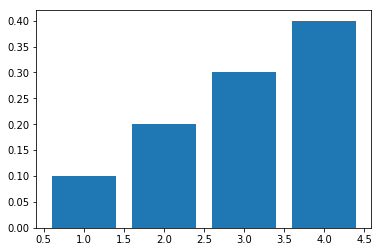

In [21]:
#PDF
plt.bar(bins,freq/(no_samples))


##<font color='red'>1.Create hist function to plot PDF.</font> 

In [66]:
def hist(x,no_bins):
    mx = np.amax(x)
    mn = np.amin(x)
    bins = np.linspace(mn,mx,no_bins)
    
    sz = (mx-mn+1)/no_bins
    
    freq = np.zeros(no_bins)
    for i in x:
#         print(i)
        temp = int(round((i-mn)/sz))
        if temp == 0:
            temp = 1
        freq[temp-1] = freq[temp-1]+1
    
    plt.figure()
    plt.bar(bins,freq/len(x))
    return bins,freq

(array([1.        , 3.66666667, 6.33333333, 9.        ]),
 array([5., 1., 0., 1.]))

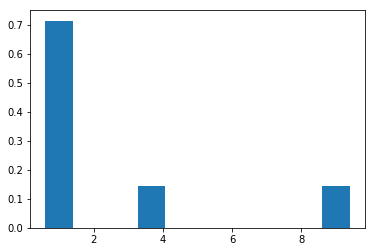

In [67]:
x = np.array([1,1,1,1,1,5,9])
hist(x,4)

## Gaussian random variable
The probability density of the normal distribution is
$$f(x|\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{(x-\mu)^2}{2\sigma^2}}$$
where,

$\mu$  is the mean or expectation of the distribution (and also its median and mode),

$\sigma$  is the standard deviation, and

$\sigma ^{2}$ is the variance.

range of variable is approximately $\mu-3\sigma$ to $\mu+3\sigma$

##<font color='red'>2. Plot Gaussian PDF using above formula with $\mu=0$ and $\sigma=1$.</font> 

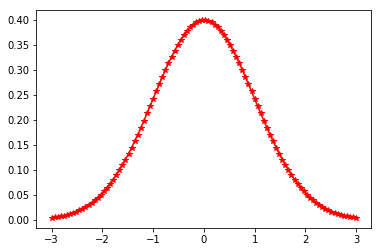

In [81]:
mu = 0
sigma = 1
temp1 = 1/math.sqrt(2*np.pi*sigma*sigma)  
x1 = np.linspace(mu-3*sigma,mu+3*sigma,100)
var = temp1*np.exp(-1*(x1-mu)*(x1-mu)/(2*sigma*sigma))
plt.plot(x1,var,'r-*')
plt.show()

###Draw random samples from a normal (Gaussian) distribution.
numpy.random.normal($\mu$, $\sigma$, number of samples)

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html

##<font color='red'>3. Genarate gaussian random variable (M=1000 samples) with $\mu=0$ and $\sigma=1$.  Plot the PDF using hist function and compare with PDF generated using above formula. Repeat for $\mu=4$ and $\sigma=4$. </font> 

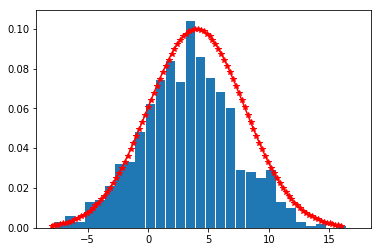

In [87]:
mu = 4
sigma = 4
M = 1000
no_bins = 30
x = np.random.normal(mu, sigma, 1000)
[bins,freq]=hist(x,no_bins)

temp1 = 1/math.sqrt(2*np.pi*sigma*sigma)  
x1 = np.linspace(mu-3*sigma,mu+3*sigma,100)
var = temp1*np.exp(-1*(x1-mu)*(x1-mu)/(2*sigma*sigma))
plt.plot(x1,var,'r-*')
#plt.plot(x1,mlab.normpdf(x1, mu, sigma),'r-*')
plt.show()


##<font color='red'>3. Plot CDF for above random variables. </font> 

In [96]:
#CDF
def CDF(bins,freq):
    cdf = np.zeros(bins.shape)
    
    for i in range(len(bins)):
        if i==0:
            cdf[i] = freq[i]
        else:
            cdf[i] = cdf[i-1] + freq[i]
    
    plt.figure()
    plt.plot(bins,cdf)
    plt.show()

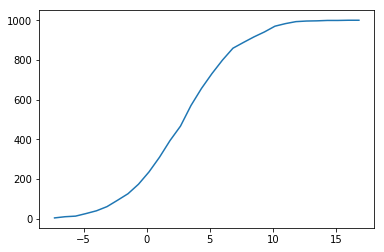

In [97]:
CDF(bins,freq)

##<font color='red'>4. For a random variable $X$ following normal distribution, show the PDF for a transformed random variable $X^2$. Find the mean and compare it with true mean. Use different values of M. </font> 

Mean of x is -0.034997
Mean of x^2 is 1.022797


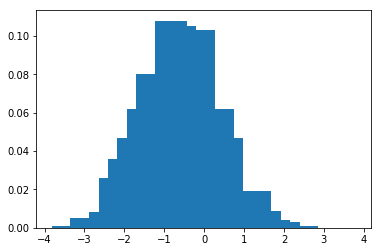

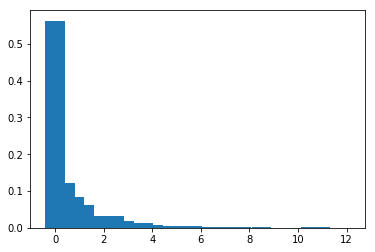

In [100]:
mu = 0
sigma = 1
M = 1000
no_bins = 30
x = np.random.normal(mu, sigma, M)

# x2 = np.zeros(shape=(M))
x2 = np.multiply(x,x)

[bins,freq]=hist(x,no_bins)    
[bins,freq]=hist(x2,no_bins)

print("Mean of x is %f"%(x.mean()))
print("Mean of x^2 is %f"%(x2.mean()))

## Uniform random variable
The probability density of the uniform distribution is
$$f(x|a,b)=\begin{cases}
    \frac{1}{b-a},& \text{if } a \leq x\leq b\\
    0,              & \text{otherwise}
\end{cases}$$


##Draw samples from a uniform distribution.
numpy.random.uniform(a,b,number of samples)

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.uniform.html

##<font color='red'>5. Genarate Uniform random variable with $a= 1$ and $b=2$. Plot the PDF and CDF.<font> 

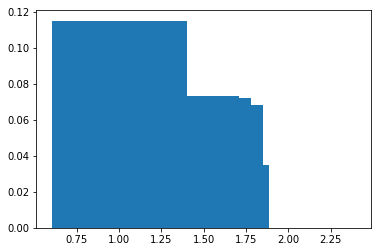

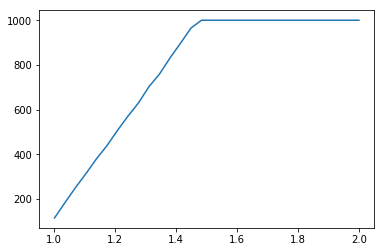

Mean of x_uniform is 1.495007
Variance of x_uniform is 0.087253


In [105]:
a=1
b=2
M = 1000
no_bins = 30
x_uniform = np.random.uniform(a,b,M)
[bins,freq]=hist(x_uniform,no_bins)

#CDF
CDF(bins,freq)

print("Mean of x_uniform is %f"%(x_uniform.mean()))
print("Variance of x_uniform is %f"%(x_uniform.var()))


##<font color='red'>6. Consider the transformed random variable Y=pX+q, where X is uniform random variable between 1 and 2. Take p=4 and q=5 and plot PDF and CDF for Y. Also find the mean and variance of Y.</font> 

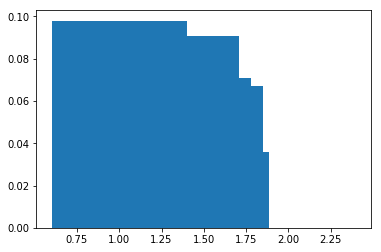

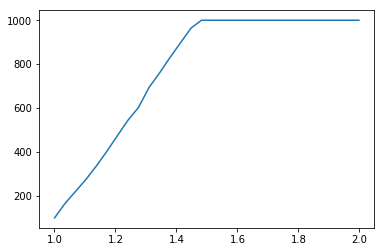

Mean of y is 11.058215
Variance of y is 1.310972


In [107]:

p = 4
q = 5
x_uniform = np.random.uniform(a,b,M)
y = p*x_uniform + q

[bins,freq]=hist(x_uniform,no_bins)
CDF(bins,freq)
print("Mean of y is %f"%(y.mean()))
print("Variance of y is %f"%(y.var()))